# How good are the solutions compared to the geometric lower bound?

The optimal tour is not following the grid.
How good can our solutions, that are based on a grid, still be compared to the best geometric tour?
We cannot compute the optimal geometric tour, but we can compute a simple geometric lower bound based on the area.

In [4]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_json("./03_clean_data.json.zip")
import shapely.wkt
data["polygon"] = data["polygon"].apply(lambda p: shapely.wkt.loads(p))

In [6]:
d = 1.0
data["geom_lb"] = data["polygon"].apply(lambda p: (p.area-math.pi*((d/2)**2))/d)

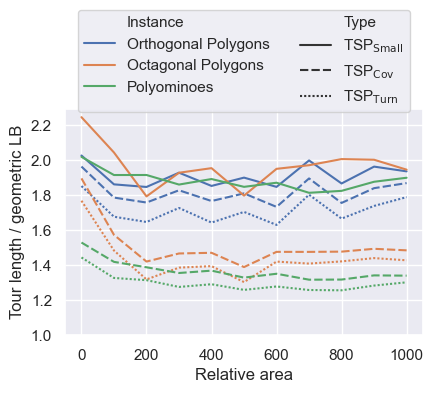

In [8]:
sns.set_theme()
t = data.copy()
t["x"] = t["relative_area"].apply(lambda x: 100*round(x/100))
t = pd.melt(t, id_vars=["x", "instance_type_simplified", "geom_lb"], value_vars=["small_tsp_obj", "tsp_obj", "mip_obj"], value_name="y", var_name="type")
t["y"]= t["y"]/t["geom_lb"]
t["type"].replace({"small_tsp_obj": "TSP$_{\mathrm{Small}}$", "tsp_obj": "TSP$_{\mathrm{Cov}}$",  "mip_obj": "TSP$_{\mathrm{Turn}}$"}, inplace=True)
fig, ax = plt.subplots(figsize=(4.5,4.5))
t.rename(columns={"instance_type_simplified": "Instance", "type": "Type"}, inplace=True)
sns.lineplot(data=t, x="x", y="y", style="Type", hue="Instance", errorbar=None)
plt.ylabel("Tour length / geometric LB")
plt.xlabel("Relative area")
plt.ylim(1.0, None)

#plt.ylim(None, 2)
plt.tight_layout()
fig.subplots_adjust(top=0.65)
plt.legend(ncol=2,bbox_to_anchor=(0.5, 1.47), loc="upper center")
plt.savefig("./out/08_geometric_lb.pdf")
plt.show()